#  **Task--02**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\gender_submission.csv")
df2 = pd.read_csv("C:\\Users\\DELL\\Downloads\\test.csv")
df3 = pd.read_csv("C:\\Users\\DELL\\Downloads\\train.csv")

# survival - Survival (0 = No; 1 = Yes)
# class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# name - Name
# sex - Sex
# age - Age
# sibsp - Number of Siblings/Spouses Aboard
# parch - Number of Parents/Children Aboard
# ticket - Ticket Number
# fare - Passenger Fare
# cabin - Cabin
# embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southbab

In [7]:
# df3["Survived"]=df["Survived"]
df2["Survived"]=df["Survived"]

In [9]:
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# df3.info()

In [11]:
df2.drop(columns="Cabin", inplace=True)

In [13]:
df2[["Name","Age"]]

,Name,Age
0,"Kelly, Mr. James",34.5
1,"Wilkes, Mrs. James (Ellen Needs)",47.0
2,"Myles, Mr. Thomas Francis",62.0
3,"Wirz, Mr. Albert",27.0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0
...,...,...
413,"Spector, Mr. Woolf",NaN
414,"Oliva y Ocana, Dona. Fermina",39.0
415,"Saether, Mr. Simon Sivertsen",38.5
416,"Ware, Mr. Frederick",NaN


## **Dealing with missing values and cleaning the dataset**

In [15]:
df2.dropna(inplace=True)

In [17]:
df2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 0 to 415
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Pclass       331 non-null    int64  
 2   Name         331 non-null    object 
 3   Sex          331 non-null    object 
 4   Age          331 non-null    float64
 5   SibSp        331 non-null    int64  
 6   Parch        331 non-null    int64  
 7   Ticket       331 non-null    object 
 8   Fare         331 non-null    float64
 9   Embarked     331 non-null    object 
 10  Survived     331 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 31.0+ KB


In [21]:
df2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [23]:
# Replace null values in 'Age' based on the average age for each Pclass
def fill_age(row):
    if pd.isnull(row['Age']):
        return age_means[row['Pclass']]
    return row['Age']

# Calculate mean Age for each Pclass, excluding NaN values
age_means = df2.groupby('Pclass')['Age'].mean()

# Apply the function to replace null values
df2['Age'] = df2.apply(fill_age, axis=1)

# Display the updated dataset
print("\nDataset After Filling Null Ages:")
print(df2)



Dataset After Filling Null Ages:
     PassengerId  Pclass                                             Name  \
0            892       3                                 Kelly, Mr. James   
1            893       3                 Wilkes, Mrs. James (Ellen Needs)   
2            894       2                        Myles, Mr. Thomas Francis   
3            895       3                                 Wirz, Mr. Albert   
4            896       3     Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                              ...   
409         1301       3                        Peacock, Miss. Treasteall   
411         1303       1  Minahan, Mrs. William Edward (Lillian E Thorpe)   
412         1304       3                   Henriksson, Miss. Jenny Lovisa   
414         1306       1                     Oliva y Ocana, Dona. Fermina   
415         1307       3                     Saether, Mr. Simon Sivertsen   

        Sex   Age  SibSp  Parch          

In [25]:
age_means = df2.groupby('Pclass')['Age'].mean()
age_means

Pclass
1    40.918367
2    28.777500
3    23.776414
Name: Age, dtype: float64

In [27]:
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1
...,...,...,...,...,...,...,...,...,...,...,...
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S,1
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,Q,1
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1


In [29]:
df2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [31]:
#replace the null value with the average fare price
df2["Fare"]=df2["Fare"].replace({np.nan:df2["Fare"].mean()})

In [33]:
df2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

# **Now We Check for Correlation and Visualize**

In [35]:
df2.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,1100.232628,2.141994,30.181269,0.483384,0.398792,40.982087,0.383686
std,122.910180,0.846251,14.104573,0.875004,0.811582,61.228558,0.487019
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,992.500000,1.000000,21.000000,0.000000,0.000000,8.050000,0.000000
50%,1100.000000,2.000000,27.000000,0.000000,0.000000,16.000000,0.000000
75%,1210.500000,3.000000,39.000000,1.000000,1.000000,40.633350,1.000000
max,1307.000000,3.000000,76.000000,8.000000,6.000000,512.329200,1.000000


In [37]:
df2[["Age","Fare"]].corr()

,Age,Fare
Age,1.000000,0.337932
Fare,0.337932,1.000000


In [39]:
df2[["Age","Survived"]].corr()

,Age,Survived
Age,1.000000,0.005104
Survived,0.005104,1.000000


<Axes: xlabel='Age', ylabel='Fare'>

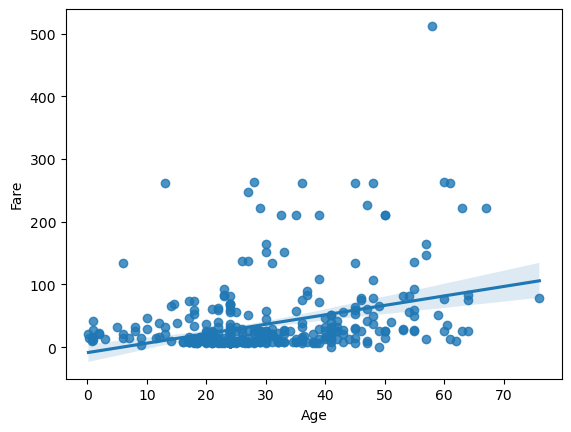

In [64]:
sns.regplot(x="Age", y="Fare", data=df2)

<Axes: xlabel='Survived', ylabel='count'>

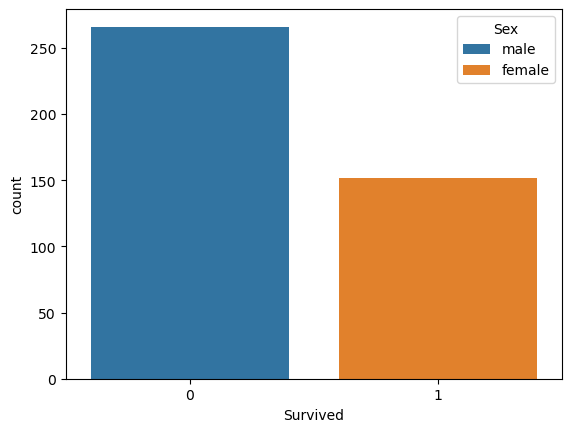

In [68]:
sns.countplot(x=df2["Survived"], hue=df2["Sex"])

In [41]:
df2[["Survived", "Sex"]].value_counts()

Survived  Sex   
0         male      204
1         female    127
Name: count, dtype: int64

In [ ]:
#There is bias in this dataset as only the females survived

<Axes: xlabel='Survived', ylabel='count'>

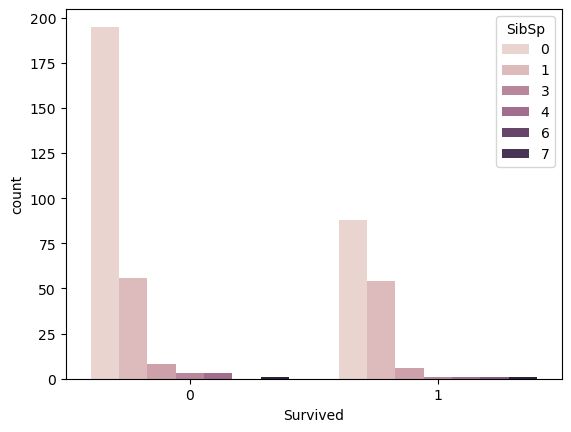

In [82]:
sns.countplot(x=df2["Survived"], hue=df2["SibSp"])

<Axes: xlabel='Sex', ylabel='Fare'>

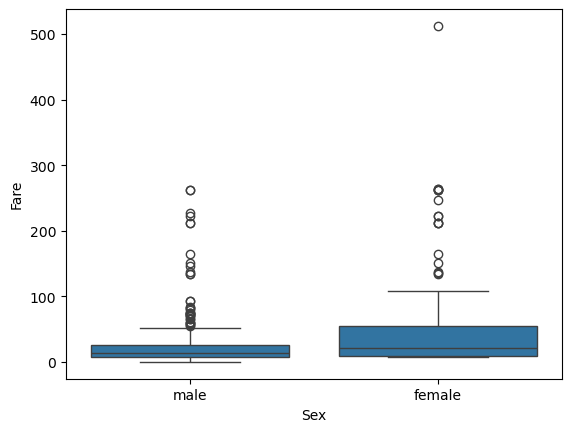

In [84]:
sns.boxplot(x="Sex",y="Fare", data=df2)

<Axes: xlabel='Pclass', ylabel='count'>

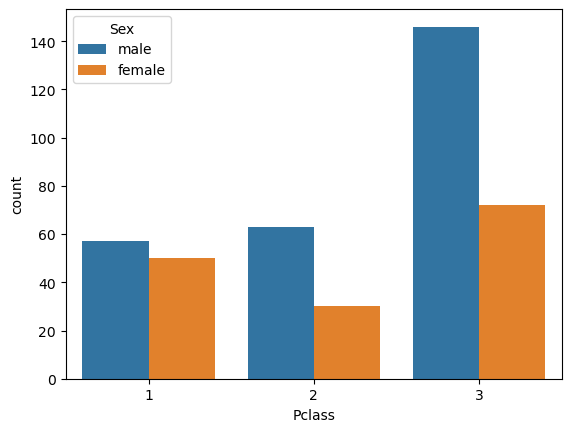

In [88]:
sns.countplot(x="Pclass", hue="Sex", data=df2)

<Axes: xlabel='Survived', ylabel='count'>

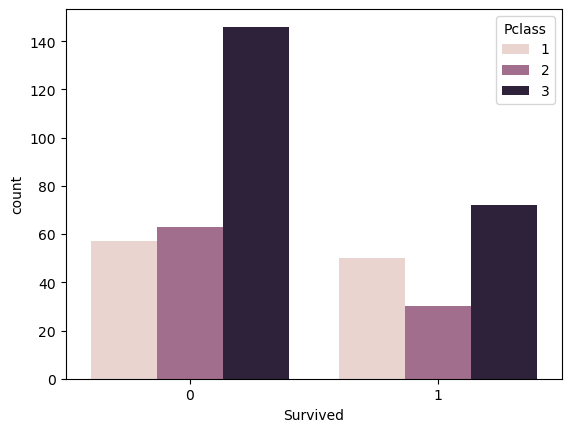

In [90]:
sns.countplot( x="Survived", hue="Pclass", data=df2)

In [92]:
df2[["Survived","Pclass"]].corr()

,Survived,Pclass
Survived,1.000000,-0.108615
Pclass,-0.108615,1.000000


In [130]:
df2[["SibSp","Parch"]].corr()

,SibSp,Parch
SibSp,1.000000,0.306895
Parch,0.306895,1.000000


<Axes: xlabel='Embarked', ylabel='count'>

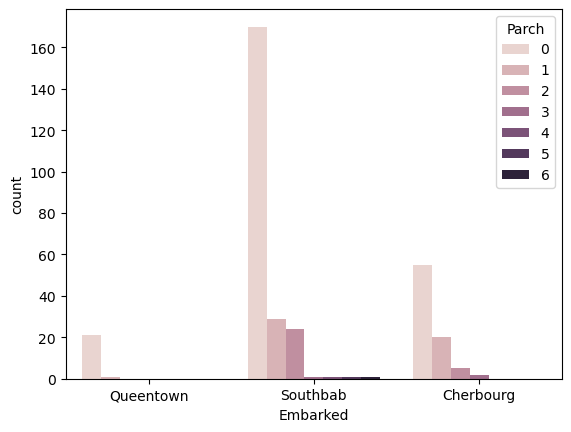

In [130]:
sns.countplot(x="Embarked",hue="Parch", data=df2)

In [154]:
Parch_Values=df2["Parch"].unique()[:6]

In [156]:
Parch_Values

array([0, 1, 3, 2, 4, 6], dtype=int64)

In [102]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Queentown,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Southbab,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Queentown,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Southbab,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Southbab,1


<Axes: xlabel='Sex', ylabel='count'>

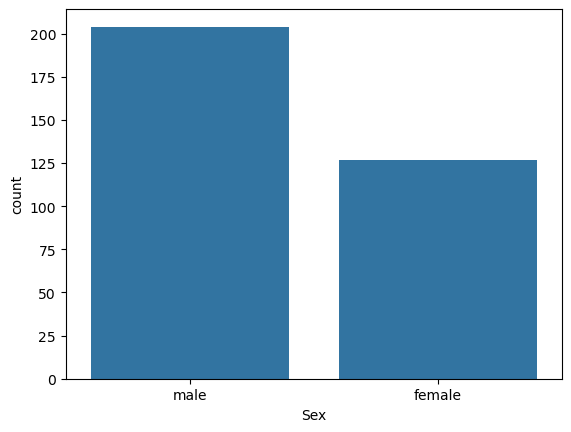

In [43]:
sns.countplot(x=df2["Sex"])

In [ ]:
#Since the Survived Column is bias i will drop it

In [47]:
df2.drop(columns="Survived", inplace=True)

In [51]:
df2["Embarked"]=df2["Embarked"].replace({"Q":"Queentown","S":"Southbab","C":"Cherbourg"})

<Axes: xlabel='Embarked', ylabel='count'>

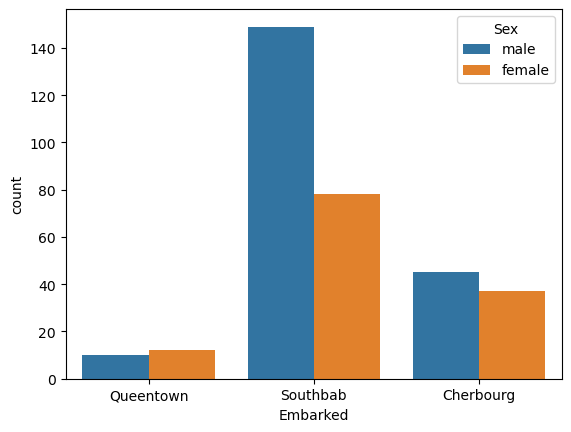

In [55]:
sns.countplot(x=df2["Embarked"], hue=df2["Sex"])

In [59]:
df2.drop(columns="Ticket", inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8940\2168155010.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x=df2["Pclass"], palette="viridis")


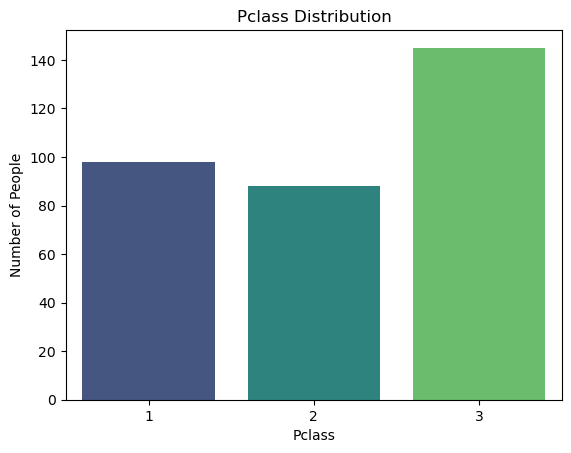

In [75]:
sns.countplot( x=df2["Pclass"], palette="viridis")
plt.title("Pclass Distribution")
plt.xlabel("Pclass")
plt.ylabel("Number of People");

In [77]:
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Queentown
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,Southbab
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Queentown
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,Southbab
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,Southbab
...,...,...,...,...,...,...,...,...,...
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,13.7750,Southbab
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,90.0000,Queentown
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,7.7750,Southbab
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,Cherbourg


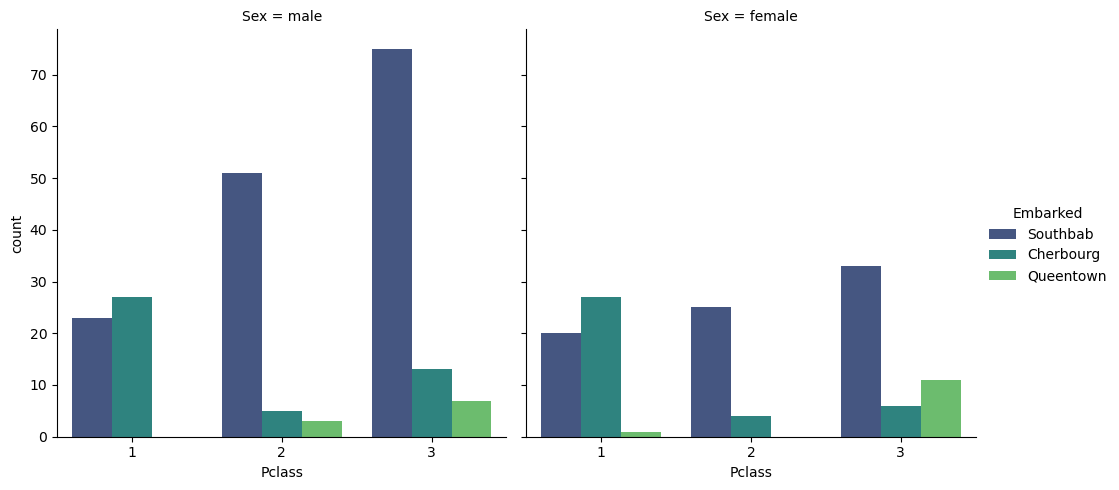

In [79]:
sns.catplot(x=df2["Pclass"], hue=df2["Embarked"], col=df2["Sex"], kind="count", palette="viridis")

C:\Users\DELL\AppData\Local\Temp\ipykernel_8940\389251002.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2["Fare"], kde=True, hist=False, ax=axes[0])
C:\Users\DELL\AppData\Local\Temp\ipykernel_8940\389251002.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2["Age"],

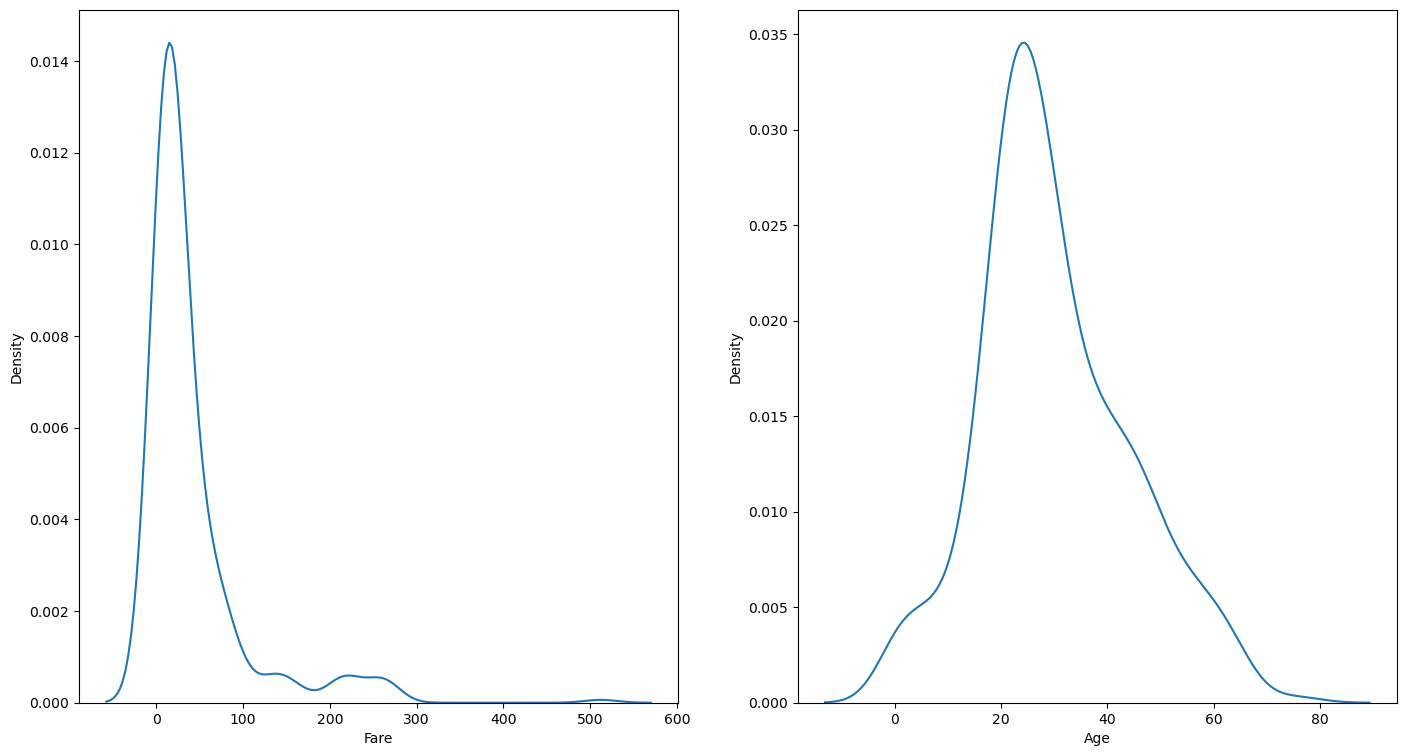

In [97]:
fig,axes=plt.subplots(1,2, figsize=(17,9))
sns.distplot(df2["Fare"], kde=True, hist=False, ax=axes[0])
sns.distplot(df2["Age"], kde=True, hist=False, ax=axes[1]);

C:\Users\DELL\AppData\Local\Temp\ipykernel_8940\2431770515.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2["Fare"], kde=True, ax=axes[0])
C:\Users\DELL\AppData\Local\Temp\ipykernel_8940\2431770515.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2["Age"], kde=True, ax=axes[1]);


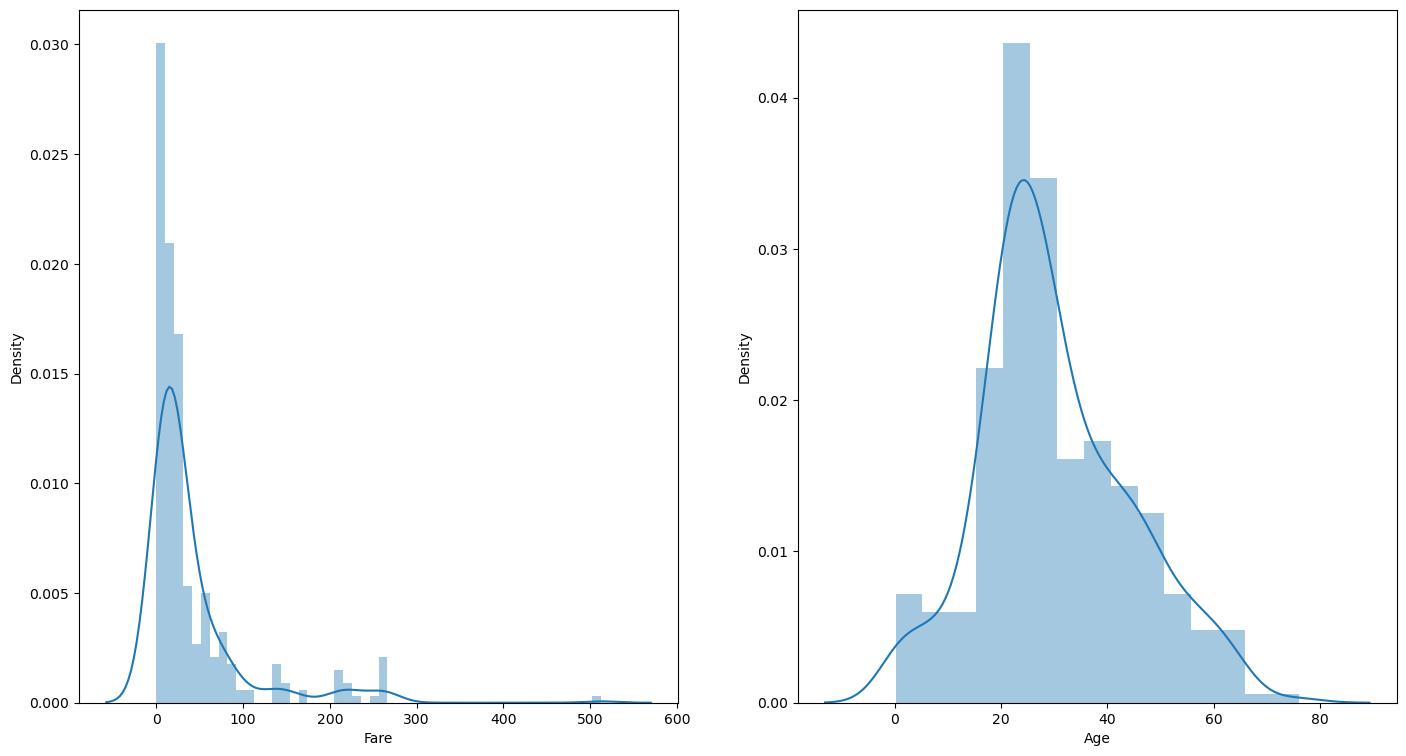

In [99]:
fig,axes=plt.subplots(1,2, figsize=(17,9))
sns.distplot(df2["Fare"], kde=True, ax=axes[0])
sns.distplot(df2["Age"], kde=True, ax=axes[1]);

In [101]:
df2["Age"].max(),df2["Age"].min()

(76.0, 0.17)

In [109]:
cut_points=[0,5,13,19,35,50,100]
label_names=["Infant","Child","Teens","Youth/Young Adults", "Adults", "Senior"]

df2["Age_Categories"]=pd.cut(df2["Age"], bins=cut_points, labels=label_names)

In [117]:
cat_pivot=df2.pivot_table(index="Age_Categories", values="Fare")

C:\Users\DELL\AppData\Local\Temp\ipykernel_8940\1137158828.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cat_pivot=df2.pivot_table(index="Age_Categories", values="Fare")


<Axes: xlabel='Embarked', ylabel='count'>

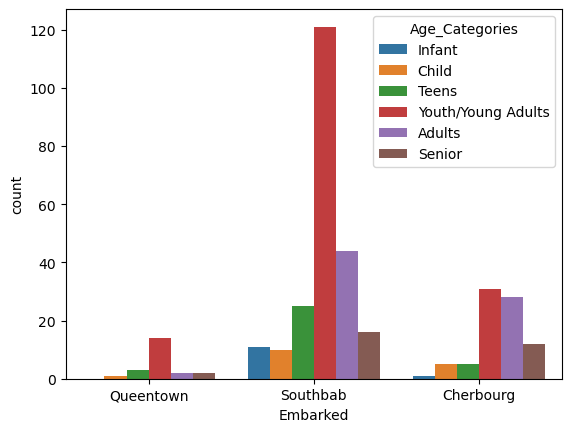

In [127]:
sns.countplot(x=df2["Embarked"], hue=df2["Age_Categories"])

# **Conclusion**

1. This Dataset had bias because only the females survived.
2. Most Females paid more for their tickets than Males.
3. Majority of the population came from Southbab
4. The distribution shows the wealthy class from Cherbourg
5. The distribution shows the Titanic was occupied by mostly Youths and Young adults for Southbab

   I will accept more contribution on this, i couldnt conduct any correlation test or hypothesis testing on the survival columns because it was inaccurate